Name:Sandip 

Labpartner(s)

In [1]:
#import statements go here

In [5]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr


# Class 10.1

# Warmups 10.1

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that given two numbers returns the maximum. Figure out the maximum number using logical control (no pre-made max functions)

In [6]:
def maximum(num1, num2):
    if num1 > num2:
        return num1
    else:
        return num2


In [7]:
print(maximum(5,18))

18


In [8]:
print(maximum(-5,-18))

-5


In [9]:
#to find three number maxmimum - we did on previous class pseudo code
#def function(arg1, arg2,arg3):
    #if arg1 greater than arg2 and arg3:
        #return arg1 as greater number
    #else if compare arg2 with arg1 and arg3:
    #if false
    #it should return arg3 as greatest number
#Pass the value of correspond arg1 arg2 and arg3 to print the max among them
#ThankYOU !

**W.2** Modify the function we developed in Lab. 9.2 W.1 to return n consective even integers

In [10]:
#program to return n consecutive even integer
def num_even(counter):
    n = counter
    start = 0
    my_list = [start]
    next_num = start
    while n > 1:
        n = n-1
        next_num += 2
        my_list = my_list + [next_num]
    return my_list

In [11]:
#to print even numbers TILL 20 using while loop ... 
num = 0
while num <=20: #control
    if num % 2 == 0: #checking for even ( for odd num (!=0))
        print(num)
    num = num + 1

0
2
4
6
8
10
12
14
16
18
20


# Lecture 10.1

### Agenda:
- Announcements
    - changes in gradiing proccess, deadlines
    - Done with datacamp
- Shoutouts for good work (Paola, Luz)
- Lab 7.2 review
- Cartopy
- Movies (with Victoria Garza)


#### Announcements

Because my health has improved since the beginning of the term, and as we move into the more advanced material, I am taking over the grading from Adrian. Join me in thanking him for his assistance to us all in a time of need. I am working on catching up on the grading now and will finish this next week. So check your grades for updates and to see if you need to redo anything. I have added my research assistant and scientific programmer Victoria Garza to slack. She is available to you all for questions as we move into the advanced material.

I did go back and re-grade some labs (4.2 in particular) as I noted they were missing some material. Please see my notes if your grade changed and submit the missing material.

Previously I mentioned that no late labs will be accepted after 4/15, at which time you all will be working on your final projects. **Further, all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by 4/1 to pass the class.** Reminder thet the last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

We are done with datacamp! (But feel free to use it as a resource as you like)

#### Shoutouts

- Paola is student of the week for all of her excellent work, well done! 
- Luz did a great job on her CV, very creative.


### Main Lecture

#### Motivation: making nice maps and animating data are great skills for scientists to engage audiences with our results, but also to better understand the systems we are studying. 

Examples:
- Gulf of Mexico sattellite data animation
- Animation from recent SEEMS seminar speaker Dr. Scott James from Baylor


#### 7.2 Review
Today we are building on what we did in Lab 7.2, which was using xarray to plot ocean model output. The vast majority of you did not complete this lab satisfactorily, which probably had something to do with it being the week after the freeze.

Since the url I used before is no longer valid, I'm going to use the netcdf subset option on the HYCOM website, which also lets me get a subset of the data (and thus a smaller file). See https://www.hycom.org/data/gomu0pt04/expt-90pt1m000 data access button

In [12]:
pip install netCDF4

In [13]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [14]:
file = 'E:/surf.nc4'

In [15]:
ssh_data = xr.open_dataset(file, decode_times=False)

In [16]:
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.86e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

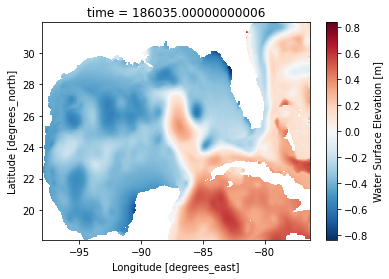

In [17]:
ssh_data.surf_el.plot()

#### Cartopy https://scitools.org.uk/cartopy/docs/latest/

Now let's make a nice plot using Catopy

In [18]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

There are a number of differnt map projections available in Cartopy.  

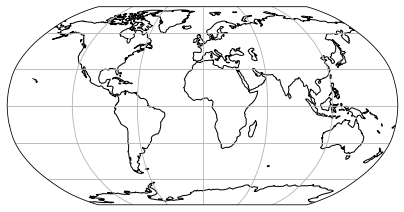

In [19]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

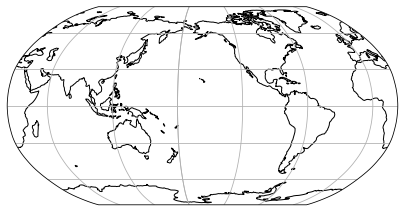

In [20]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the emap
ax.coastlines(resolution='110m')
ax.gridlines()

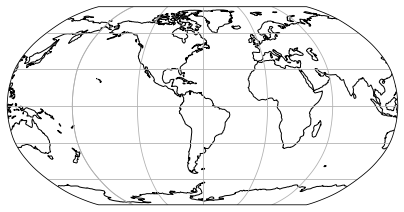

In [21]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

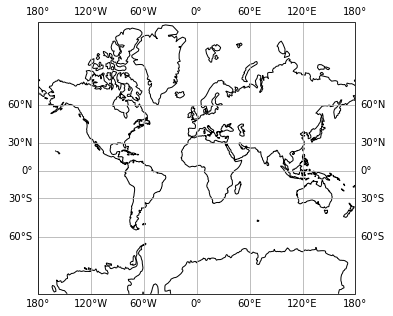

In [22]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

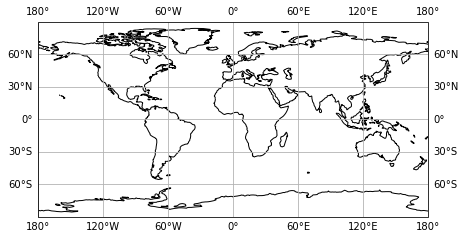

In [23]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

Let's zoom into the Gulf of Mexico. We want to set the lat and lon range to match our HYCOM data. How do we find this?

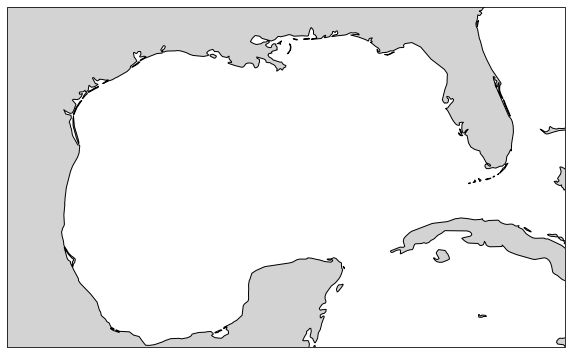

In [24]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [25]:
# what does our data look like again?
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.86e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

C:\Users\sandi\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\sandi\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


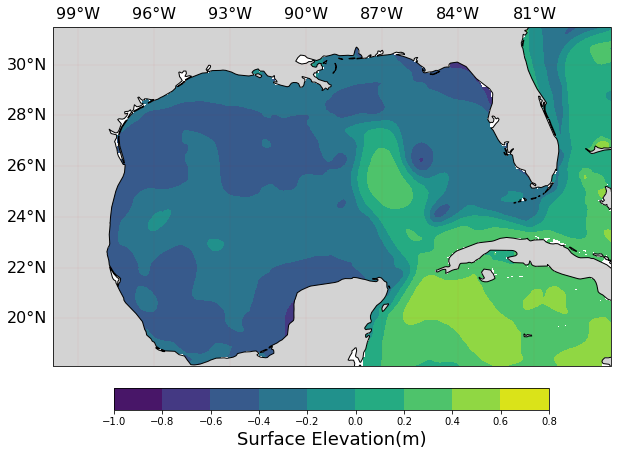

In [26]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = ssh_data.lon
y = ssh_data.lat
var =  ssh_data.surf_el[0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

#CREATES COLORBAR BASED ON CONTOUR
cbar = plt.colorbar(p, orientation = 'horizontal', pad = 0.05, fraction = 0.05)
cbar.set_label("Surface Elevation" + '(m)', size = 18)

#addition of grid lines on the graph
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = False,
                 linewidth = 0.05, color = 'red', linestyle = '--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in.

#### Making Movies demo by Victoria 
(also see ppt slides in github)

# Lab 10.1

**E.1** Pick two of the examples in the Cartopy gallery (https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and go through the code. Make three modifications for each of the two examples and document what you did.

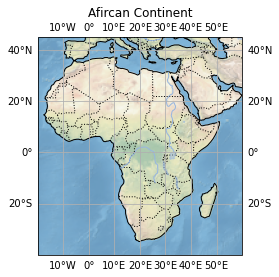

In [27]:
#INITIAL MAP
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.gridlines(draw_labels=True)   #ADDED GRIDLINES
    ax.stock_img() #added stock image for nice sea and land rendering
    ax.set_title("Afircan Continent") #added title
    plt.show()


if __name__ == '__main__':
    main()

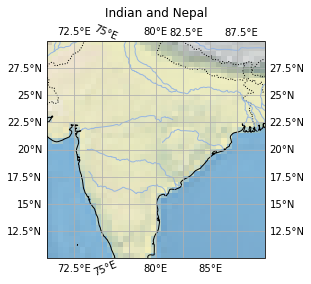

In [28]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([70, 90, 10, 30], crs=ccrs.PlateCarree()) # set lat long to indian sub continent

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
  
    ax.add_feature(cfeature.RIVERS)
    ax.gridlines(draw_labels=True)                     #Grid Lines
    ax.stock_img()                                   #stock image addition
    ax.set_title("Indian and Nepal")                     
    plt.show()


if __name__ == '__main__':
    main()

In [29]:
#Changes are
#1. The latitude and longitude changed to Indian SubContinent
#2. Grid lines added
#3.Stock Image added
#4.Title Changed

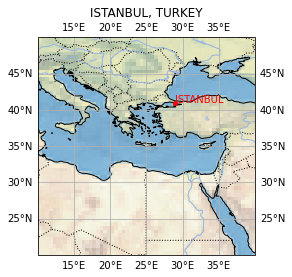

In [30]:
#LOCATION MAP FOR ISTANBUL, TURKEY

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([10, 40, 20, 50], crs=ccrs.PlateCarree()) # set lat long to indian sub continent

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
  
    ax.add_feature(cfeature.RIVERS)
    plt.plot(28.96, 41.01, color = 'Red', markersize=4, marker='o', transform = ccrs.PlateCarree())
    plt.text(28.96, 41.01, 'ISTANBUL', color = 'Red', horizontalalignment='left', transform=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)                     #Grid Lines
    ax.stock_img()                                   #stock image addition
    ax.set_title("ISTANBUL, TURKEY")                     #added title
    plt.show()


if __name__ == '__main__':
    main()

In [31]:
#Important note :
#Any Natural Earth dataset can easily be used by creating an instance of cartopy.feature.NaturalEarthFeature. For example
#import cartopy.feature as cfeature
#land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        #edgecolor='face',
                                        #facecolor=cfeature.COLORS['land'])

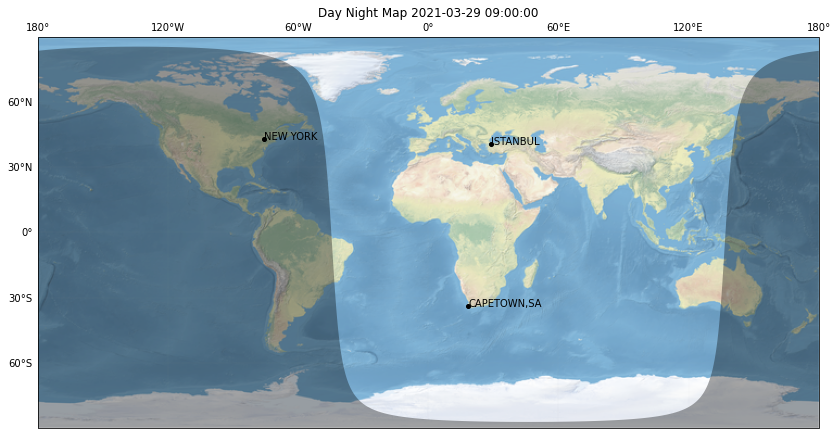

In [32]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade


fig = plt.figure(figsize=(14, 8))                              #Changed the size...
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

date = datetime.datetime(2021, 3, 29, 9)                       #Changed the date and time - today's time
                                    
ax.set_title('Day Night Map {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.35))                      #The night shade is darker
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels = False,
                 linewidth = 0.05, linestyle = '--')                #added GRID LINES
plt.plot(-75.61, 42.93, color = 'Black', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-75.61, 42.93, 'NEW YORK', color = 'Black', horizontalalignment='left', transform=ccrs.PlateCarree())
plt.plot(28.96, 41.01, color = 'Black', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(28.96, 41.01, 'ISTANBUL', color = 'Black', horizontalalignment='left', transform=ccrs.PlateCarree())
plt.plot(18.42, -33.92, color = 'Black', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(18.42, -33.92, 'CAPETOWN,SA', color = 'Black', horizontalalignment='left', transform=ccrs.PlateCarree())
gl.xlabels_top = True
gl.ylabels_left = True
plt.show()
#There is no change when GLOBAL EXTENT is removed


In [33]:
#Documentation of Change

In [34]:
#Changed the size...
#Changed the date and time - today's time
#The night shade is darker
#added GRID LINES
#Added three cities
# I was trying to add all city corresponding time, but could not do it.
    #plt.text(28.96, 41.01, 'ISTANBUL {}'.FORMAT(DATE), color = 'Black', horizontalalignment='left', transform=ccrs.PlateCarree())
    #Denotes the input time 12:00 only
    

**E.2** Download and plot HYCOM sea surface temperature for two diferent days (perhaps different seasons or sequential days, up to you) using cartopy. Add a grid, lat/lon labels, and annotate by adding a marker of the city/town you are living in. Make sure you adjust the colorbar to be a good fit to the data.


In [35]:
file = 'https://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-03-24T12:00:00Z'

In [36]:
sea_temp = xr.open_dataset(file, decode_times=False)

In [37]:
SST = sea_temp #checking the data
SST


<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 133, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 48.0 49.0 50.0 51.0 ... 177.0 178.0 179.0 180.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes: (12/13)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

In [38]:
SST.time


<xarray.DataArray 'time' (time: 133)>
array([ 48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167.,
       168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178., 179.,
       180.])
Coordinates:
  * time     (time) float64 48.0 49.0 50.0 51.0 52.0 ... 177.0 178.0 179.0 180.0
Attributes:
    long_name:            Forecast time for ForecastModelRunCollection
    standard_name:        time
    calendar:             proleptic_gregorian
    units:                hours since 2021-03-22 12:00:00.000 UTC
    _CoordinateAxisType:  Time

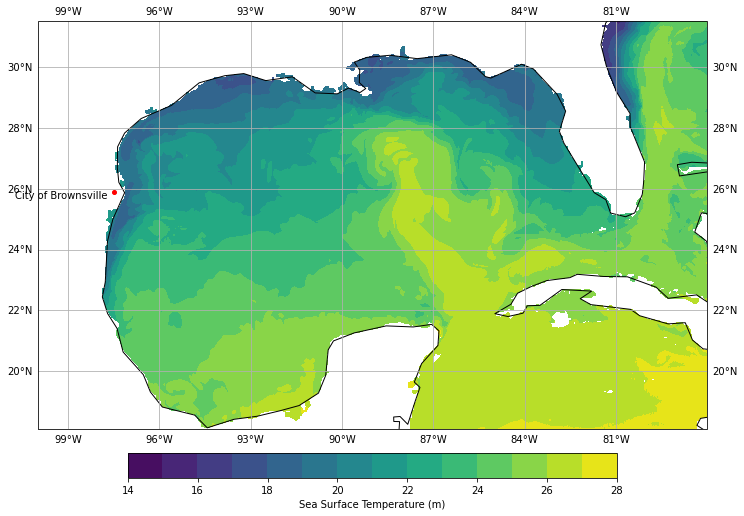

In [39]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())

x = SST.lon
y = SST.lat
var = SST.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST1.png')

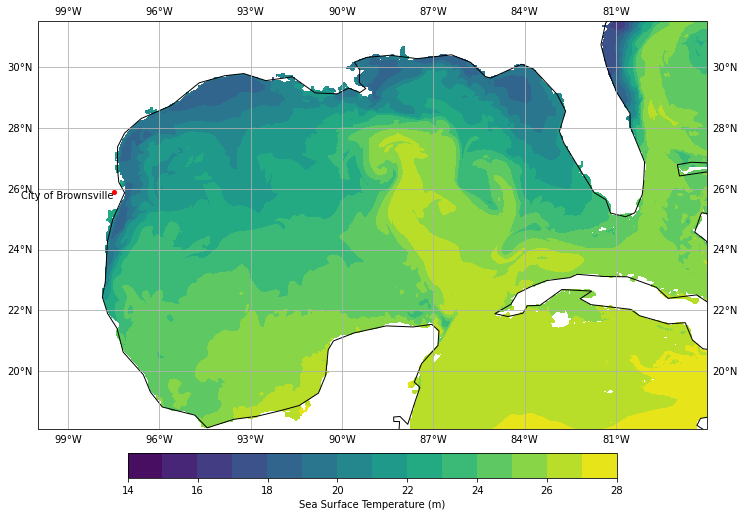

In [40]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#one day later
x = SST.lon
y = SST.lat
var = SST.water_temp[24,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST2.png')

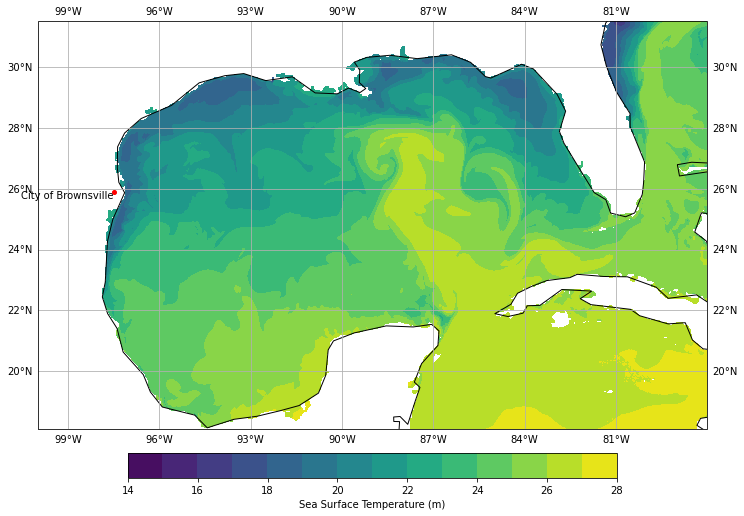

In [41]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())

#two days later
x = SST.lon
y = SST.lat
var = SST.water_temp[48,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST3.png')

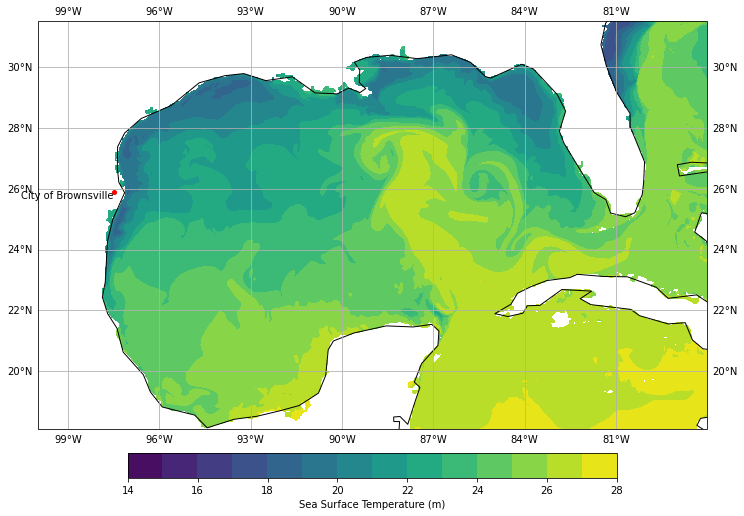

In [42]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())

#three days later
x = SST.lon
y = SST.lat
var = SST.water_temp[72,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST4.png')

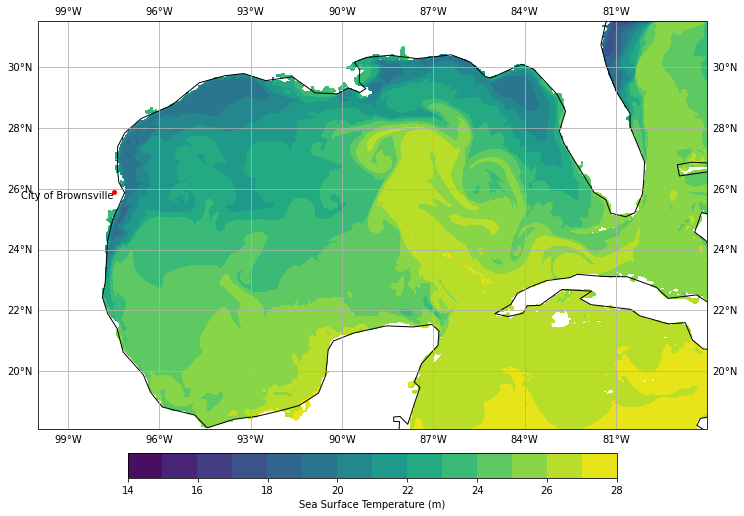

In [43]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())

#four days later
x = SST.lon
y = SST.lat
var = SST.water_temp[96,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST5.png')

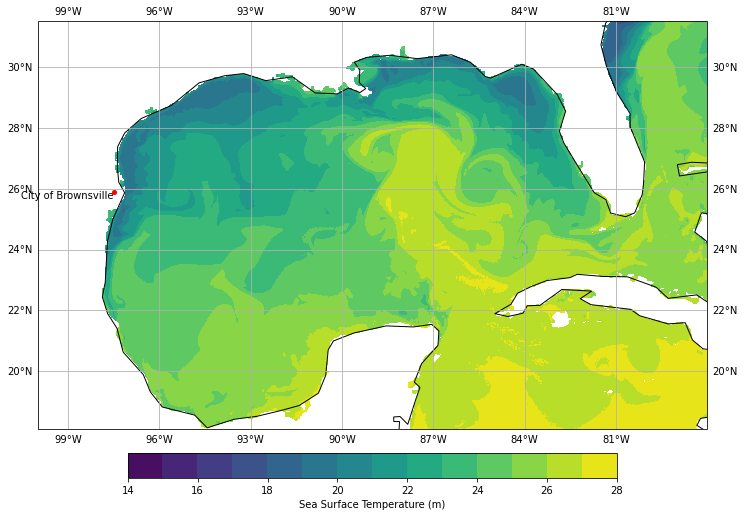

In [44]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.4975, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())

#five days later
x = SST.lon
y = SST.lat
var = SST.water_temp[120,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SST6.png')

**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.

In [45]:
#This task is of water temperature analysis from November 02, 2020 to March 02 2021.. A monthly analysis..

In [46]:
#PRACTICE

In [47]:
doc = 'E:/20201102.nc4'

In [48]:
water_tempractice = xr.open_dataset(doc, decode_times=False)

In [49]:
water_tempractice

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.827e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

In [50]:
SWT = water_tempractice
SWT

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.827e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

In [51]:
SWT.time

<xarray.DataArray 'time' (time: 1)>
array([182675.])
Coordinates:
  * time     (time) float64 1.827e+05
Attributes:
    long_name:            Valid Time
    units:                hours since 2000-01-01 00:00:00
    time_origin:          2000-01-01 00:00:00
    calendar:             gregorian
    axis:                 T
    NAVO_code:            13
    _CoordinateAxisType:  Time

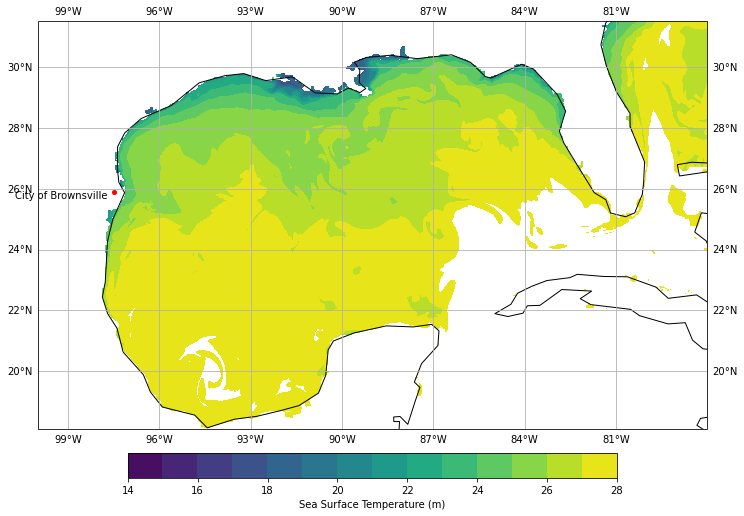

In [58]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#Month of November 2020fa

x = SWT.lon
y = SWT.lat
var = SWT.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SWT1.png')

In [59]:
dec = 'E:/20201202.nc4'

In [54]:
water_tempractice2 = xr.open_dataset(dec, decode_times=False)

In [55]:
SWT2 = water_tempractice2
SWT2

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.834e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

In [56]:
SWT2.time

<xarray.DataArray 'time' (time: 1)>
array([183395.])
Coordinates:
  * time     (time) float64 1.834e+05
Attributes:
    long_name:            Valid Time
    units:                hours since 2000-01-01 00:00:00
    time_origin:          2000-01-01 00:00:00
    calendar:             gregorian
    axis:                 T
    NAVO_code:            13
    _CoordinateAxisType:  Time

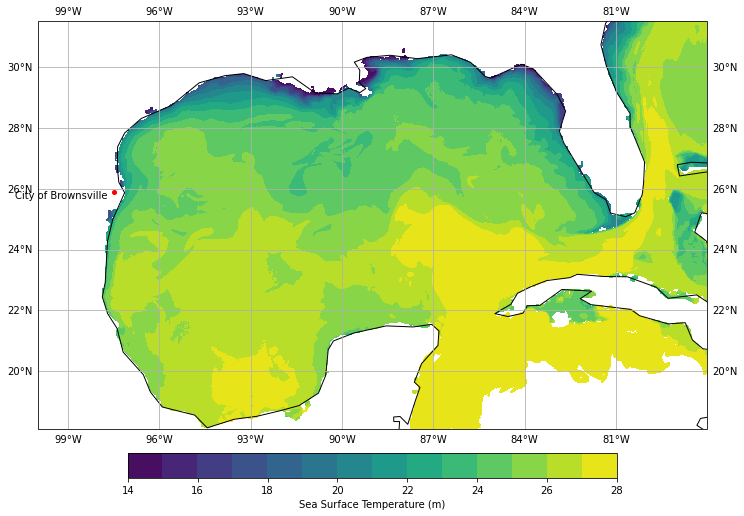

In [57]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#Month of December 2020
x = SWT2.lon
y = SWT2.lat
var = SWT2.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SWT2.png')

In [60]:
jan = 'E:/20210102.nc4'

In [61]:
water_tempractice3 = xr.open_dataset(jan, decode_times=False)
SWT3 = water_tempractice3
SWT3

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.862e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

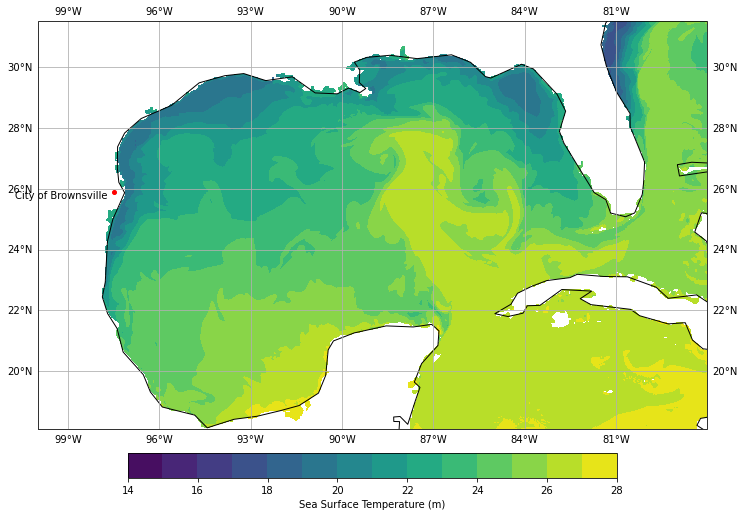

In [62]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#Month of January
x = SWT3.lon
y = SWT3.lat
var = SWT3.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SWT3.png')

In [63]:
feb = 'E:/20210202.nc4'

In [64]:
water_tempractice4 = xr.open_dataset(feb, decode_times=False)
SWT4 = water_tempractice4
SWT4

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.849e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

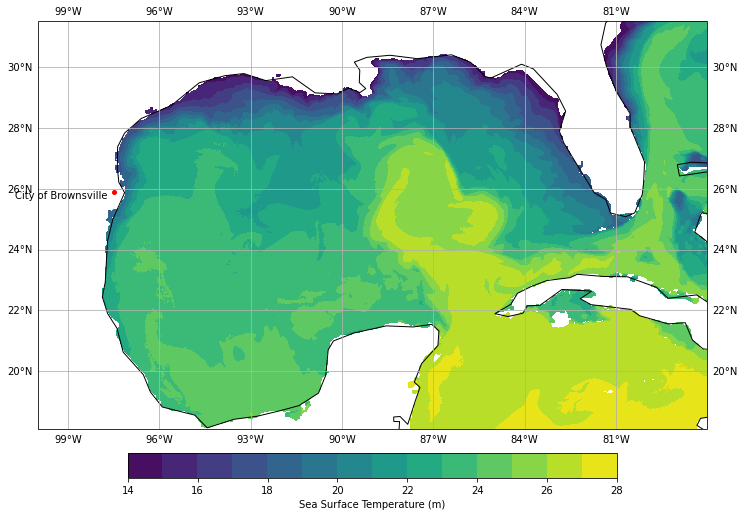

In [65]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#Month of February
x = SWT4.lon
y = SWT4.lat
var = SWT4.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SWT4.png')

In [66]:
mar = 'E:/20210303.nc4'

In [67]:
water_tempractice5 = xr.open_dataset(mar, decode_times=False)
SWT5 = water_tempractice5
SWT5

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.856e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes: (12/14)
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    ...                        ...
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

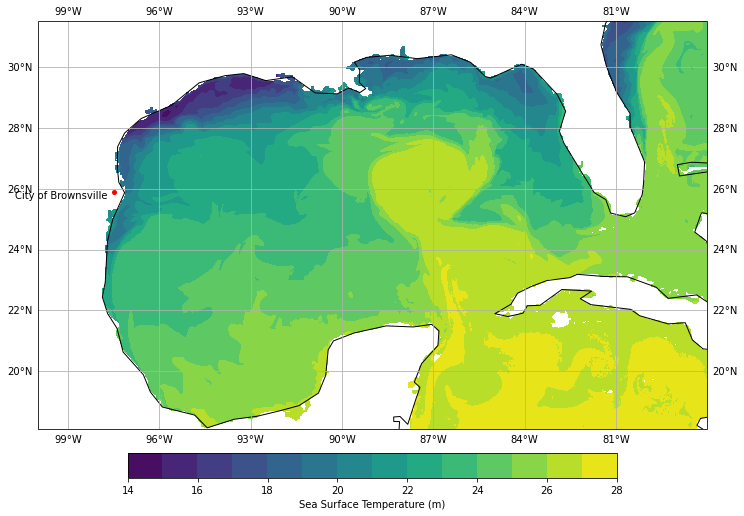

In [68]:
fig, ax = plt.subplots(figsize =(12,9))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
plt.plot(-97.4975, 25.9017, color = 'red', markersize=4, marker='o', transform = ccrs.PlateCarree())
plt.text(-97.7, 25.7017, 'City of Brownsville', horizontalalignment='right', transform=ccrs.PlateCarree())
#Month of March
x = SWT5.lon
y = SWT5.lat
var = SWT5.water_temp[0,0,:,:]

#Contours
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), levels = np.arange(14, 29, 1)) # projection is needed in every plot call
cbar = plt.colorbar(p, orientation = 'horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Temperature (m)")
plt.savefig('SWT5.png')